In [1]:
#Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read the Dataset
climate = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 3/Boston_climate.xlsx")

In [3]:
#Displaying the first five rows of the dataset
climate.head()

,Date,Temp_Avg
0,2019-01-01,30.7
1,2019-02-01,33.5
2,2019-03-01,39.1
3,2019-04-01,51.7
4,2019-05-01,57.8


In [4]:
#To find the statistics of the dataset
climate.describe()

,Temp_Avg
count,59.000000
mean,53.981356
std,15.347745
min,27.400000
25%,40.000000
50%,54.700000
75%,67.950000
max,78.700000


In [5]:
#To find whether there are any existing null values or not
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      59 non-null     datetime64[ns]
 1   Temp_Avg  59 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 KB


In [6]:
#Count of duplicated rows
climate[climate.duplicated()]

,Date,Temp_Avg


<Axes: >

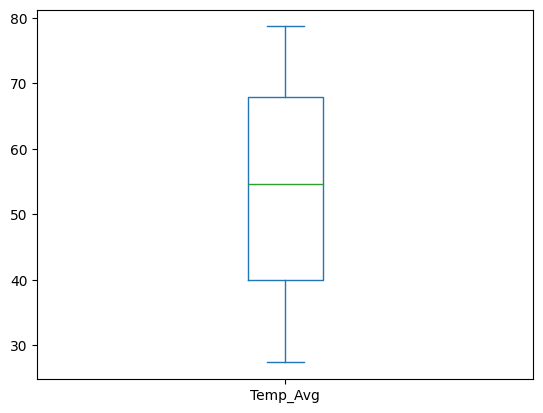

In [7]:
#Outlier Detection
climate.plot(kind='box')

In [8]:
#Change Date column as index
climate['Date'] = pd.to_datetime(climate['Date'])
climate.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Time Series Plot - Average Temperature of Boston')

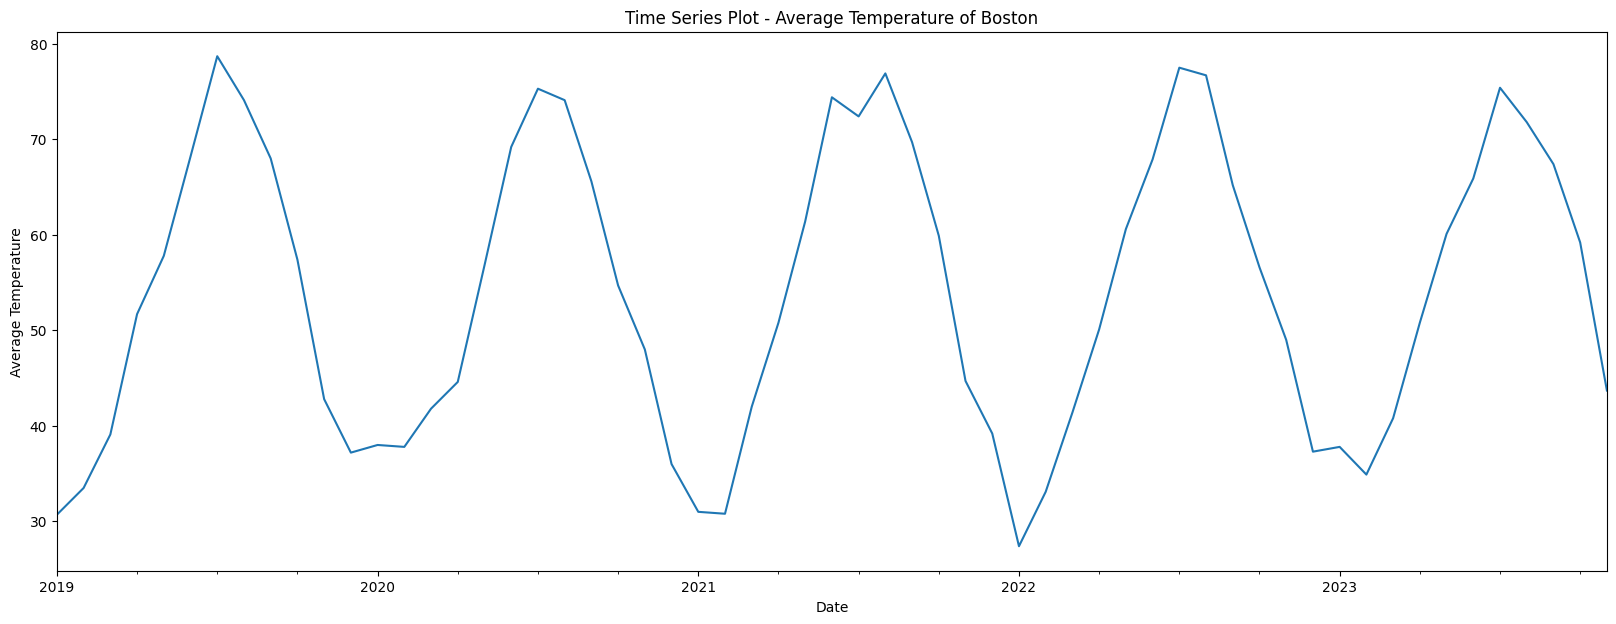

In [9]:
#Time Plot of 'Temp_Avg'
fig= plt.figure(figsize=(20,7))
climate["Temp_Avg"].plot()
plt.ylabel('Average Temperature')
plt.title('Time Series Plot - Average Temperature of Boston')

# Time series decomposition plot


<Figure size 4000x2000 with 0 Axes>

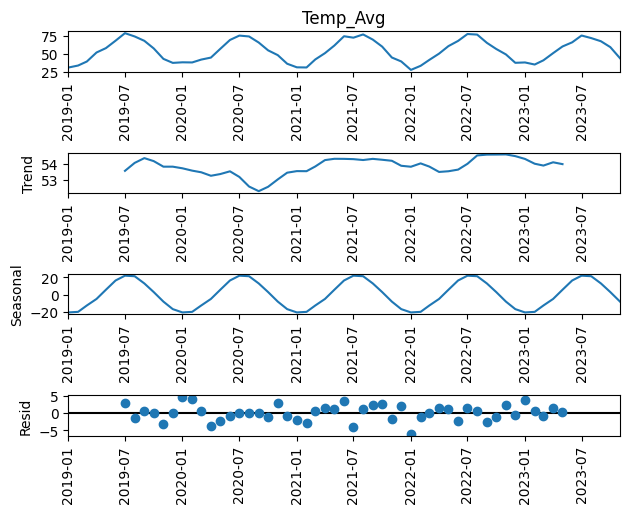

In [10]:
fig = plt.figure(figsize=(40, 20))

decompose_ts_add = seasonal_decompose(climate["Temp_Avg"], period=12)
decompose_plot = decompose_ts_add.plot()

# Rotate x-axis ticks by 90 degrees for all subplots
for ax in decompose_plot.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Increase space between each subplot
plt.subplots_adjust(hspace=2)

plt.show()

# ACF plots and PACF plots


<Figure size 4000x2000 with 0 Axes>

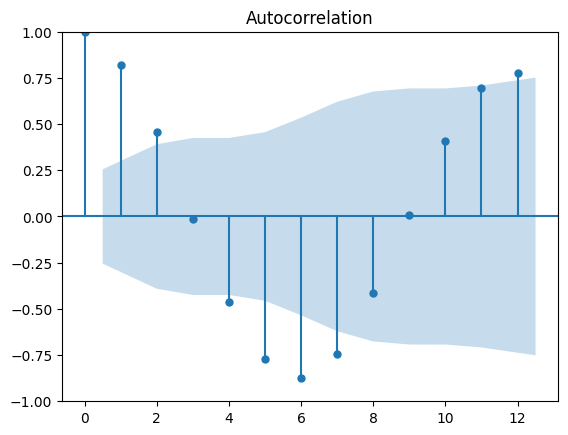

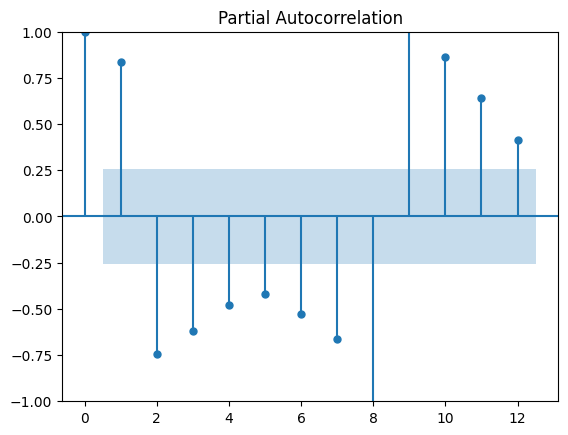

In [11]:
# Plotting autocorrelation and partial autocorrelation for the 'Temp_Avg' column
import statsmodels.graphics.tsaplots as tsa_plots
fig = plt.figure(figsize=(40, 20))
tsa_plots.plot_acf(climate["Temp_Avg"],lags=12)
tsa_plots.plot_pacf(climate["Temp_Avg"],lags=12)
plt.show()

Splitting Data

In [12]:
# Split the data into training and testing sets
train_size = int(len(climate) * 0.8)  # 80% for training, 20% for testing
Train, Test = climate[:train_size], climate[train_size:]

# 1. Exponential Smoothing Methods

### Evaluation Metric MAPE

In [13]:
# Function to calculate the Mean Absolute Percentage Error (MAPE) between predicted 'pred' and observed 'org' values
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [14]:
Train

,Temp_Avg
Date,
2019-01-01,30.7
2019-02-01,33.5
2019-03-01,39.1
2019-04-01,51.7
2019-05-01,57.8
2019-06-01,68.2
2019-07-01,78.7
2019-08-01,74.1
2019-09-01,68.0


In [15]:
Test

,Temp_Avg
Date,
2022-12-01,37.3
2023-01-01,37.8
2023-02-01,34.9
2023-03-01,40.8
2023-04-01,50.8
2023-05-01,60.1
2023-06-01,65.9
2023-07-01,75.4
2023-08-01,71.8


### Simple Exponential Method


In [16]:
# Simple Exponential Smoothing (SES) model fitting and prediction
ses_model = SimpleExpSmoothing(Train["Temp_Avg"].astype('double')).fit(smoothing_level=1)
pred_ses = np.array(ses_model.predict(start = Test.index[0],end = Test.index[-1]))
print(pred_ses.shape)
print(Test["Temp_Avg"].shape)

(12,)
(12,)


In [17]:
def MAPE(pred, org):
    if pred.shape != org.shape:
        # Handle shape mismatch or reshape arrays if needed
        min_length = min(pred.shape[0], org.shape[0])
        pred = pred[:min_length]
        org = org[:min_length]

    temp = np.abs((pred - org) / org) * 100
    return np.mean(temp)

In [18]:
#MAPE Value for SES Model
mape_ses_model = MAPE(pred_ses, np.array(Test["Temp_Avg"]))
print(f"MAPE for SES Method: {mape_ses_model}")

MAPE for SES Method: 24.38160545811606


In [19]:
ses_model.summary()

Dep. Variable:,Temp_Avg,No. Observations:,47
Model:,SimpleExpSmoothing,SSE,3393.870
Optimized:,True,AIC,205.140
Trend:,None,BIC,208.840
Seasonal:,None,AICC,206.093
Seasonal Periods:,None,Date:,"Sun, 10 Dec 2023"
Box-Cox:,False,Time:,19:15:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,False
initial_level,30.700000,l.0,True


### Holt's method

In [20]:
# Holt method
from statsmodels.tsa.holtwinters import Holt

# Update smoothing_slope to smoothing_trend
holt_model = Holt(Train["Temp_Avg"].astype('double')).fit(smoothing_level=0.8, smoothing_trend=0.2)

# Predict using the model
pred_holt = holt_model.predict(start=Test.index[0], end=Test.index[-1])

# Calculate and print MAPE
mape_holt_model = MAPE(pred_holt, Test["Temp_Avg"])
print(f"MAPE for Holt method: {mape_holt_model}")

MAPE for Holt method: 37.79485368527257


In [21]:
holt_model.summary()

Dep. Variable:,Temp_Avg,No. Observations:,47
Model:,Holt,SSE,5145.976
Optimized:,True,AIC,228.704
Trend:,Additive,BIC,236.104
Seasonal:,None,AICC,230.804
Seasonal Periods:,None,Date:,"Sun, 10 Dec 2023"
Box-Cox:,False,Time:,19:15:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8000000,alpha,False
smoothing_trend,0.2000000,beta,False


### Holt-Winter's exponential smoothing with additive seasonality and additive trend


In [22]:
# Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the training data
hwe_model_add_add = ExponentialSmoothing(Train["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_add_add = MAPE(pred_hwe_add_add,Test["Temp_Avg"])
mape_hwe_model_add_add

3.848487986520052

In [23]:
hwe_model_add_add.summary()

Dep. Variable:,Temp_Avg,No. Observations:,47
Model:,ExponentialSmoothing,SSE,249.001
Optimized:,True,AIC,110.364
Trend:,Additive,BIC,139.966
Seasonal:,Additive,AICC,134.792
Seasonal Periods:,12,Date:,"Sun, 10 Dec 2023"
Box-Cox:,False,Time:,19:15:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,7.1086e-09,beta,True


### Holt-Winter's exponential smoothing with multiplicative seasonality and additive trend

In [24]:
# Fitting a Holt-Winters Exponential Smoothing model with multiplicative seasonality and additive trend to the training data
hwe_model_mul_add = ExponentialSmoothing(Train["Temp_Avg"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
mape_hwe_model_mul_add=MAPE(pred_hwe_mul_add,Test["Temp_Avg"])
mape_hwe_model_mul_add

3.990810805084788

In [25]:
hwe_model_mul_add.summary()

Dep. Variable:,Temp_Avg,No. Observations:,47
Model:,ExponentialSmoothing,SSE,247.532
Optimized:,True,AIC,110.086
Trend:,Additive,BIC,139.688
Seasonal:,Multiplicative,AICC,134.514
Seasonal Periods:,12,Date:,"Sun, 10 Dec 2023"
Box-Cox:,False,Time:,19:15:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,1.4148e-08,beta,True


Comparison of Results

In [26]:
#Compare the results 
data = {"MODEL":pd.Series(["ses_model","holt_model","hwe_model_add_add","hwe_model_mul_add"]),"MAPE_Values":pd.Series([mape_ses_model,mape_holt_model,mape_hwe_model_add_add,mape_hwe_model_mul_add])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['MAPE_Values'])

,MODEL,MAPE_Values
2,hwe_model_add_add,3.848488
3,hwe_model_mul_add,3.990811
0,ses_model,24.381605
1,holt_model,37.794854


## Based on the least MAPE value: Final Model (Holts winter exponential smoothing with additive seasonality and additive trend) Plot on Test Data

In [27]:
# Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the training data
hwe_model_add_add = ExponentialSmoothing(Train["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit()

In [28]:
# Generating forecast values using the trained Holt-Winters Exponential Smoothing model with additive trend and additive seasonality
forecast = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])

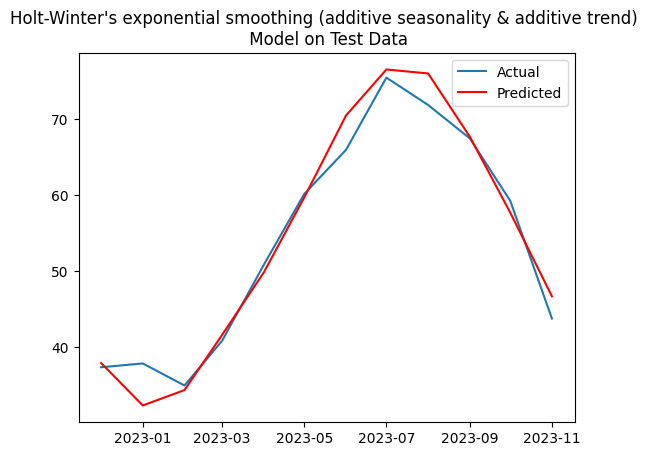

In [29]:
# Plot the actual vs predicted values of the Test data
import matplotlib.pyplot as plt

plt.plot(Test['Temp_Avg'], label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.title(f"Holt-Winter's exponential smoothing (additive seasonality & additive trend) \n Model on Test Data")
plt.legend()
plt.show()

## Based on the least MAPE value: Final Model (Holts winter exponential smoothing with additive seasonality and additive trend) for the entire dataset

In [30]:
# Fitting a Holt-Winters Exponential Smoothing model with additive trend and additive seasonality to the entire 'climate' dataset
hwe_model_add_add = ExponentialSmoothing(climate["Temp_Avg"].astype('double'),seasonal="add",trend="add",seasonal_periods=12).fit()

In [31]:
#Forecasting for next 10 time periods
forecast = hwe_model_add_add.forecast(10)
forecast

2023-12-01    37.706393
2024-01-01    33.317877
2024-02-01    34.357636
2024-03-01    41.357827
2024-04-01    49.937774
2024-05-01    59.677741
2024-06-01    69.457727
2024-07-01    76.197705
2024-08-01    75.057707
2024-09-01    67.517795
Freq: MS, dtype: float64

# 2. Data-Driven Time Series Forecasting Models

In [32]:
#Read the Dataset
climate = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 3/Boston_climate.xlsx")

In [33]:
# Extracting Day, weekday name, month name, year from the Date column
climate["month"] = climate.Date.dt.strftime("%b")
climate["year"] = climate.Date.dt.strftime("%Y")

In [34]:
climate.head()

,Date,Temp_Avg,month,year
0,2019-01-01,30.7,Jan,2019
1,2019-02-01,33.5,Feb,2019
2,2019-03-01,39.1,Mar,2019
3,2019-04-01,51.7,Apr,2019
4,2019-05-01,57.8,May,2019


In [35]:
#Preprocessing the "climate" DataFrame by extracting the first three characters from the "month" column, creating dummy variables for months, adding time-related features, and calculating the natural logarithm of the "Temp_Avg" column
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

for i in range(59):
    p = climate["month"][i]
    climate['month'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(climate['month']))
climate1 = pd.concat([climate,month_dummies],axis = 1)

climate1["t"] = np.arange(1,60)

climate1["t_squared"] = climate1["t"]*climate1["t"]
climate1.columns
climate1["log_T_Avg"] = np.log(climate1["Temp_Avg"])

In [36]:
climate1.head()

,Date,Temp_Avg,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_T_Avg
0,2019-01-01,30.7,Jan,2019,0,0,0,0,1,0,0,0,0,0,0,0,1,1,3.424263
1,2019-02-01,33.5,Feb,2019,0,0,0,1,0,0,0,0,0,0,0,0,2,4,3.511545
2,2019-03-01,39.1,Mar,2019,0,0,0,0,0,0,0,1,0,0,0,0,3,9,3.666122
3,2019-04-01,51.7,Apr,2019,1,0,0,0,0,0,0,0,0,0,0,0,4,16,3.945458
4,2019-05-01,57.8,May,2019,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.056989


Splitting the data

In [37]:
# Split the data into training and testing sets
train_size = int(len(climate1) * 0.8)
Train, Test = climate1[:train_size], climate1[train_size:]

In [38]:
Test

,Date,Temp_Avg,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_T_Avg
47,2022-12-01,37.3,Dec,2022,0,0,1,0,0,0,0,0,0,0,0,0,48,2304,3.618993
48,2023-01-01,37.8,Jan,2023,0,0,0,0,1,0,0,0,0,0,0,0,49,2401,3.632309
49,2023-02-01,34.9,Feb,2023,0,0,0,1,0,0,0,0,0,0,0,0,50,2500,3.552487
50,2023-03-01,40.8,Mar,2023,0,0,0,0,0,0,0,1,0,0,0,0,51,2601,3.708682
51,2023-04-01,50.8,Apr,2023,1,0,0,0,0,0,0,0,0,0,0,0,52,2704,3.927896
52,2023-05-01,60.1,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,53,2809,4.096010
53,2023-06-01,65.9,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0,54,2916,4.188138
54,2023-07-01,75.4,Jul,2023,0,0,0,0,0,1,0,0,0,0,0,0,55,3025,4.322807
55,2023-08-01,71.8,Aug,2023,0,1,0,0,0,0,0,0,0,0,0,0,56,3136,4.273884
56,2023-09-01,67.4,Sep,2023,0,0,0,0,0,0,0,0,0,0,0,1,57,3249,4.210645


# Linear Model

In [39]:
#Calculating the RMSE value between the actual and predicted values using the Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Temp_Avg~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_linear))**2))
rmse_linear

14.561381446891192

# Exponential Model

In [40]:
#Calculating the RMSE value between the actual and predicted values using the Exponential Model
Exp = smf.ols('Temp_Avg~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

4.366877336920034e+25

# Quadratic Model

In [41]:
#Calculating the RMSE value between the actual and predicted values using the Quadratic Model
Quad = smf.ols('Temp_Avg~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_Quad))**2))
rmse_Quad

14.663357297620024

# Additive Seasonality Model

In [42]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Model
add_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea))**2))
rmse_add_sea

2.5945299474371315

# Additive Seasonality Linear Model

In [43]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Linear Model
add_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_linear = pd.Series(add_sea_linear.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t']]))
rmse_add_sea_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea_linear))**2))
rmse_add_sea_linear

2.627240252579258

# Additive Seasonality Quadratic Model

In [44]:
#Calculating the RMSE value between the actual and predicted values using the Additive Seasonality Quadratic Model
add_sea_Quad = smf.ols('Temp_Avg~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

2.7154204349891335

# Multiplicative Seasonality Model

In [45]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Model
Mul_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

3.3196355602348806e+32

# Multiplicative Seasonality Linear Model

In [46]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Linear Model
Mul_sea_linear = smf.ols('Temp_Avg~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea_linear = pd.Series(Mul_sea_linear.predict(Test))
rmse_Mult_sea_linear = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_sea_linear)))**2))
rmse_Mult_sea_linear

5.449201264582348e+32

# Multiplicative Seasonality Quadratic Model

In [47]:
#Calculating the RMSE value between the actual and predicted values using the Multiplicative Seasonality Quadratic Model
Mul_quad_sea = smf.ols('Temp_Avg~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_quad_sea = pd.Series(Mul_quad_sea.predict(Test))
rmse_Mult_quad_sea = np.sqrt(np.mean((np.array(Test['Temp_Avg'])-np.array(np.exp(pred_Mult_quad_sea)))**2))
rmse_Mult_quad_sea 

7.32472535598626e+32

Comparison of Results

In [48]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_Mult_quad_sea","rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_sea_linear","rmse_add_sea_linear"]),"RMSE_Values":pd.Series([rmse_Mult_quad_sea,rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_sea_linear,rmse_add_sea_linear])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea,2.594530e+00
8,rmse_add_sea_linear,2.627240e+00
5,rmse_add_sea_quad,2.715420e+00
1,rmse_linear,1.456138e+01
3,rmse_quad,1.466336e+01
2,rmse_exp,4.366877e+25
6,rmse_Mult_sea,3.319636e+32
7,rmse_Mult_sea_linear,5.449201e+32
0,rmse_Mult_quad_sea,7.324725e+32


# Based on the least RMSE value: Final Model (Additive Seasonality Model) Plot on Test Data

In [49]:
#Additive Seasonality Quadratic 
add_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [50]:
forecast = pd.Series(add_sea.predict(Test))

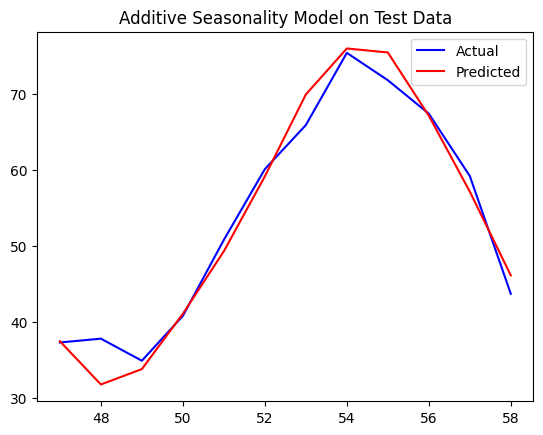

In [51]:
# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(Test['Temp_Avg'], color = 'blue', label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.title(f'Additive Seasonality Model on Test Data')
plt.legend()
plt.show()

# Based on the least RMSE value: Final Model (Additive Seasonality Quadratic Model) for the entire dataset

In [52]:
#Additive Seasonality Quadratic
add_sea = smf.ols('Temp_Avg~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=climate1).fit()

In [53]:
#Create a DataFrame for the next 10 periods
future_periods = pd.DataFrame({
    't': range(len(climate) + 1, len(climate) + 11),  # Assuming 't' is the time variable
    't_squared': np.arange(len(climate) + 1, len(climate) + 11)**2,  # Quadratic term
    'Jan': 0, 'Feb': 0, 'Mar': 0, 'Apr': 0, 'May': 0, 'Jun': 0,
    'Jul': 0, 'Aug': 0, 'Sep': 0, 'Oct': 0, 'Nov': 0  # Set seasonal variables for future periods
})

#Use the fitted model to predict values for the next 10 periods
forecast = add_sea.predict(future_periods)

#Display the forecast values
print(forecast)

0    37.425
1    37.425
2    37.425
3    37.425
4    37.425
5    37.425
6    37.425
7    37.425
8    37.425
9    37.425
dtype: float64


# 3. Time Series Forecasting using ARIMA Model

In [54]:
#Importing the Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools

In [55]:
#Read the Dataset
climate = pd.read_excel("C:/Users/sujik/OneDrive/Documents/MS - Data Science/Semester 3 (Fall_23)/MTH 522 - Advanced Mathematical Stats/Project 3/Boston_climate.xlsx")

In [56]:
#Converts the "Date" column in the "climate" DataFrame to a datetime format using Pandas' pd.to_datetime function and then sets the "Date" column as the index of the DataFrame using set_index.
from statsmodels.tsa.arima.model import ARIMA

climate['Date'] = pd.to_datetime(climate['Date'])
climate.set_index('Date', inplace=True)

In [57]:
climate.head()

,Temp_Avg
Date,
2019-01-01,30.7
2019-02-01,33.5
2019-03-01,39.1
2019-04-01,51.7
2019-05-01,57.8


### Stationarity Check

In [58]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(climate['Temp_Avg'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -8.670353597200837
p-value: 4.564129009307574e-14


The p-value obtained from the Augmented Dickey-Fuller (ADF) test is used to determine the stationarity of a time series. p-value ≤ 0.05: If the p-value is less than or equal to 0.05, we reject the null hypothesis. This indicates that there is enough evidence to suggest that the time series is stationary. In other words, the time series has no unit root, and it is relatively stable over time.

In this case, with a p-value of 4.564129009307574e-14 (a very small value close to zero), you would reject the null hypothesis. This suggests that your temperature time series is likely stationary, which is a good prerequisite for applying models like ARIMA that assume stationarity.

Splitting Data

In [59]:
# Split the data into training and testing sets
train_size = int(len(climate) * 0.8)
Train, Test = climate[:train_size], climate[train_size:]

### Grid Search for Best Hyper parameters selection

In [60]:
p = d = q = range(0, 6)
pdq = list(itertools.product(p, d, q))

best_rmse = float('inf')
best_params = None

for param in pdq:
    try:
        model = ARIMA(Train, order=param)
        fit_model = model.fit()
        forecast = fit_model.forecast(steps=len(Test))
        rmse = sqrt(mean_squared_error(Test, forecast))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = param

    except:
        continue

print(f'Best parameters: {best_params}, Best RMSE: {best_rmse}')

Best parameters: (4, 1, 3), Best RMSE: 2.1215219728704655


# Final ARIMA Model (based on the best parameters) Plot on Test Data

In [61]:
# Fit the ARIMA model
model = ARIMA(Train, order=best_params)
fit_model = model.fit()

Root Mean Squared Error (RMSE): 2.1215219728704655


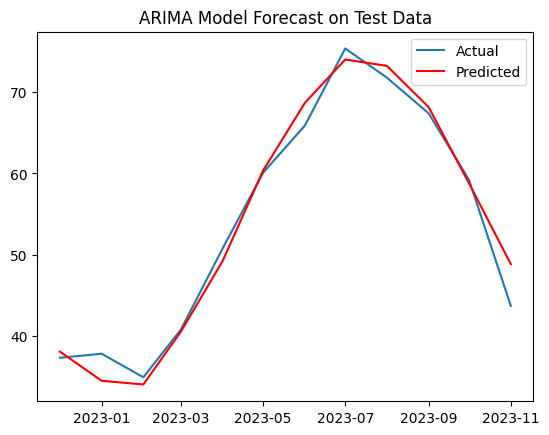

In [62]:
# Forecast the test set
forecast = fit_model.forecast(steps=len(Test))

# Calculate the RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(Test, forecast))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the actual vs predicted values
import matplotlib.pyplot as plt

plt.plot(Test, label='Actual')
plt.plot(forecast, color='red', label='Predicted')
plt.title(f'ARIMA Model Forecast on Test Data')
plt.legend()
plt.show()

# Final ARIMA Model based on the best parameters for the entire dataset

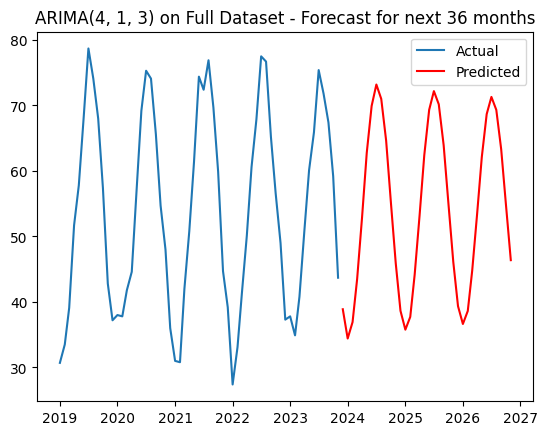

In [63]:
# Fit the final model with the best parameters
final_model = ARIMA(climate, order=best_params)
final_fit_model = final_model.fit()

# Forecast the entire dataset
forecast_all = final_fit_model.forecast(steps=36)

# Plot the actual vs. predicted values for the entire dataset
plt.plot(climate, label='Actual')
plt.plot(forecast_all, color='red', label='Predicted')
plt.title(f'ARIMA{best_params} on Full Dataset - Forecast for next 36 months')
plt.legend()
plt.show()